In [5]:
import os
import pathlib
import sys

#conda_prefix_path = pathlib.Path('sky130inv')
#ite_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
#sys.path.append(str(site_package_path.resolve()))
#CONDA_PREFIX = str(conda_prefix_path.resolve())
#PATH = os.environ['PATH']
#LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
#%env CONDA_PREFIX={CONDA_PREFIX}
#%env PATH={CONDA_PREFIX}/bin:{PATH}

#%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
#%env OPENLANE_ROOT=
%env PDK_ROOT=/home/monib/OpenLane/pdks
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env OPENLANE_LOCAL_INSTALL=1

env: PDK_ROOT=/home/monib/OpenLane/pdks
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: OPENLANE_LOCAL_INSTALL=1


In [6]:
import os 
os.environ['PATH']


'/home/monib/.local/bin:/home/monib/bin:/home/monib/anaconda3/bin:/home/monib/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/Windows/system32:/mnt/c/Windows:/mnt/c/Windows/System32/Wbem:/mnt/c/Windows/System32/WindowsPowerShell/v1.0:/mnt/c/Windows/System32/OpenSSH:/mnt/c/Program Files/MATLAB/R2022a/bin:/mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common:/mnt/c/Program Files/Docker/Docker/resources/bin:/mnt/c/ProgramData/DockerDesktop/version-bin:/mnt/c/Users/Monib Ahmed/AppData/Local/Microsoft/WindowsApps:/snap/bin:/home/monib/OpenLane:/home/monib/OpenLane/scripts'

In [1]:
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

Cloning into 'OpenLane'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (466/466), done.
remote: Compressing objects: 100% (387/387), done.
remote: Total 466 (delta 70), reused 281 (delta 38), pack-reused 0
Receiving objects: 100% (466/466), 2.77 MiB | 4.19 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [2]:
%%writefile inverter.v
module inverter(input wire in, output wire out);
    assign out = !in;
endmodule

Overwriting inverter.v


In [3]:
%%writefile config.tcl
set ::env(DESIGN_NAME) inverter
set ::env(VERILOG_FILES) "inverter.v"
set ::env(CLOCK_TREE_SYNTH) 0
set ::env(CLOCK_PORT) ""
set ::env(PL_RANDOM_GLB_PLACEMENT) 1
set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 50 50"
set ::env(PL_TARGET_DENSITY) 0.80
set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6
set ::env(DIODE_INSERTION_STRATEGY) 3

# disable version checks because we use conda packaged versions
set ::env(TEST_MISMATCHES) none
# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Overwriting config.tcl


In [6]:
!flow.tcl -design .

OpenLane 94521291e39eb5895aceb059b655cd2532d5564b
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /home/monib/OpenLane/pdks
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /home/monib/eda-toolchain/sky130inv/runs/RUN_2022.08.22_15.15.11
[INFO]: Preparing LEF files for the nom corner...
[ERROR]: during executing: "openroad -python /home/monib/OpenLane/scripts/odbpy/lefutil.py get_metal_layers -o /home/monib/eda-toolchain/sky130inv/runs/RUN_2022.08.22_15.15.11/tmp/layers.list /home/monib/OpenLane/pdks/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef"
[ERROR]: Exit code: 1
[ERROR]: Last 10 lines:
couldn't execute "openroad": permission denied

no such variable
    (read trace on

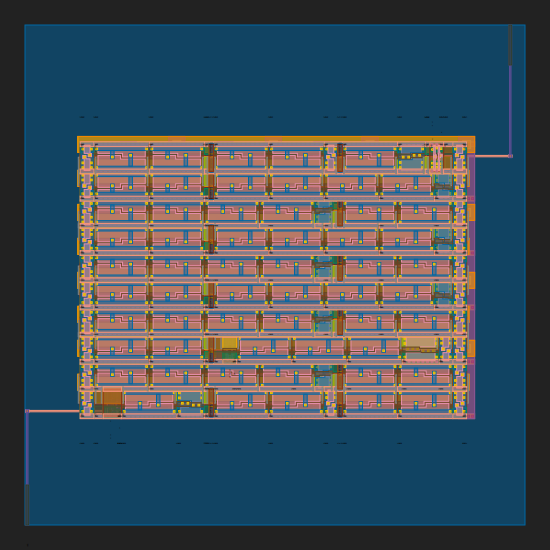

In [6]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')